# __Spaceship Titanic__

I am not a expert in data science. This is my first try in this competition after lot of researches. There might be some issues. I hope you like this. These all written by myself and please leave a comment.. 

## __Workflow Stages__

1. Problem definition.
2. Acquire training and testing data.
3. Wrangle, Prepare, Cleanse the data.
4. Analyze, identify patterns and explore the data.
5. Model, Predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

* We may combine multiple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* We may drop a stage altogether

## __Problem definition__

Predict which passengers are transported to an alternate dimension

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

* To help rescue crews and retrieve the lost passengers, we have to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## __Workflow goals__

The datascience solutions workflow solves for seven major goals.

__Classifing__. We may want to classify or categorize our samples. We may also want to undestand the implications or correlations of different classes with ourr solution goals

__Correlation__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__. For modelling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all feature to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithm may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the result.

__Creating__. Can we create new feature based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to slect the right visualization plots and charts depending on nature of the data and the solution goals.

In [102]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## __Acquire data__

Import train and test data sets using python pandas library and we create a variable called combine with combining train and test data sets together.

In [103]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

## __Analize data by describing__

With pandas library we can use it to answer following questions.

#### __Which features are available in the dataset?__

In [104]:
print(test_df.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name']


#### __Which features are categorical?__

THese values classify the samples into sets of similar samples. (nominal, ordinal, ratio, interval based)

* Categorical
    * HomePlanet
    * CryoSleep
    * Destination
    * VIP
    * Transported

#### __Which features are numerical?__

These values change from sample to sample. (Discrete, Continuous, Timeseries based)

* Continuous
    * Age
    * RoomService
    * FoodCourt
    * ShoppingMall
    * Spa
    * VRDeck

In [105]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### __Which features are mixed types?__

Numerical, alphanumerical data within same feature.

* Alphanumerical
    * Cabin

#### __Which feature may contain errors of typos?__

None of feature contain errors still

#### __Which feature contain blank, null, empty values?__

* In train data set,
    * HomePlanet      201
    * CryoSleep       217
    * Cabin           199
    * Destination     182
    * Age             179
    * VIP             203
    * RoomService     181
    * FoodCourt       183
    * ShoppingMall    208
    * Spa             183
    * VRDeck          188
    * Name            200
* In test data set,
    * HomePlanet       87
    * CryoSleep        93
    * Cabin           100
    * Destination      92
    * Age              91
    * VIP              93
    * RoomService      82
    * FoodCourt       106
    * ShoppingMall     98
    * Spa             101
    * VRDeck           80
    * Name             94

In [106]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [107]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#### __What are the data types for various features.?__

* 6 features are float
* 7 features are object(strings)
* 1 feature is boolian (bool)

In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### __What is the distribution of numerical feature values across the sample?__

* This dataset has 8693 samples
* A very few elders  within age range 60-79

In [109]:
train_df.shape

(8693, 14)

In [110]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### __What is the distribution of categorical features?__

* Most of Names are unique but only 2 samples not
* Earth is the Home planet of most passangers
* 5439 out of 8492, passangers didn't in CryoSleep
* There are 6560 cabins
* Most Passangers wasn't VIP
* Around half of the samples(4378) were transported

In [111]:
train_df.describe(include=['O', bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


## __Assumptions based on data analysis__

We arrived following assumptions based on data analysis so far.

* __Correlation__ : We want to know how well does each feature correlated with Transport

* __Completeting__: We want to complete HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck features. I think they are correlated with transport

* __Creating__:
    * We should create a value ranges for Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck features

## __Analyze by pivolating features__

We can analyze our feature correlation by pivolating features against each other. So we can use HomePlanet, CryoSleep, Destination, VIP features against transported feature.

* __HomePlanet__ We can observe significant correlation among HomePlanet=Europa. So we decide to use HomePlanet feature for our model training.

* __CryoSleep__ We can see cryo sleepers had higher transport rate

* __Destination__ 55 Cancri e had higher transport rate. So we consider destination feature also in the model training.

* __VIP__ Non vip passangers also had higher transport rate.

In [112]:
train_df[['HomePlanet','Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [113]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [114]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [115]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


## __Analyze by visualizing data__

We can continue our assumptions using visualizing data

#### __Correlation numerical features__

* __Observations__
    * Age < 4 had Higher transport rate
    * Most passangers were in 15-40 Age range
    * Passangers who belongs to age 20-30 did not transported

* __Decisions__
    * Consider Age feature for model training
    * Create a age range

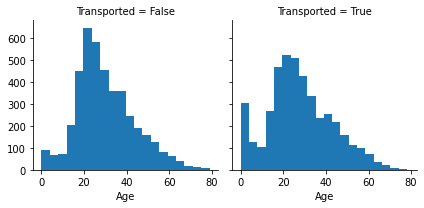

In [116]:
grid = sns.FacetGrid(train_df,col='Transported')
grid.map(plt.hist, 'Age', bins=20)

#### __Correlation numerical and categorical features__

* __Observations__
    * Passangers who ware HomePlannet Earth had low Transport rate
    * HomePlannet mars and Earth passengers who belongs to age < 4 mostly Transported
    * There is a correlation between VIP and Transport
    
* __Decisions__
    * Consider HomePlanet feature for model training
    * Introduce VIP and Destination Features also for model training

We can combine multiple features for identify correlation using a single plot. This can be done with numeric and categorical features which have nymeric values

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


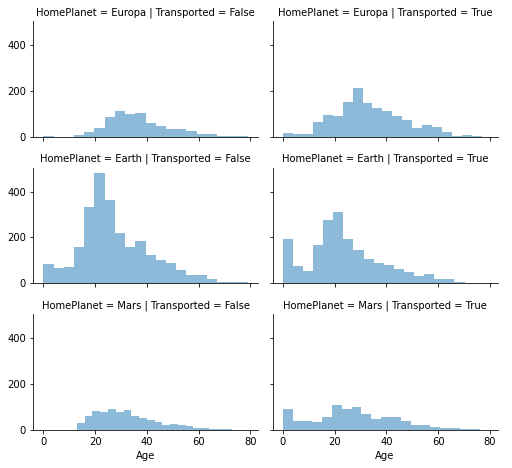

In [117]:
grid = sns.FacetGrid(train_df, col='Transported', row='HomePlanet', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


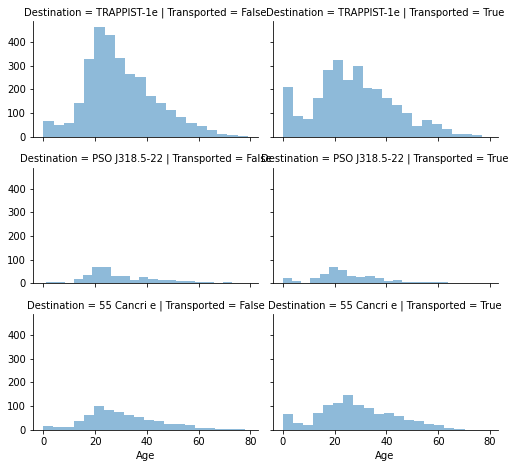

In [118]:
grid = sns.FacetGrid(train_df, col='Transported', row='Destination', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


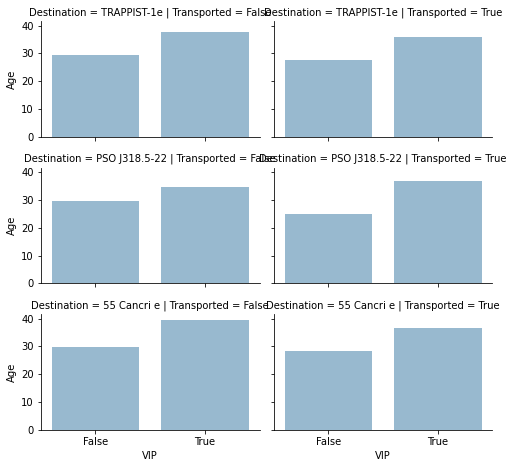

In [119]:
grid = sns.FacetGrid(train_df, row='Destination', col='Transported', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'VIP', 'Age', alpha=.5, ci=None)

#### __Correlation categorical features__

* __Observations__
    * Mars value is changing one Destination to another
    * We can see all 3 destination Cryo sleepers were transported

* __Decisions__
    * Use CryoSleep to our model training

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


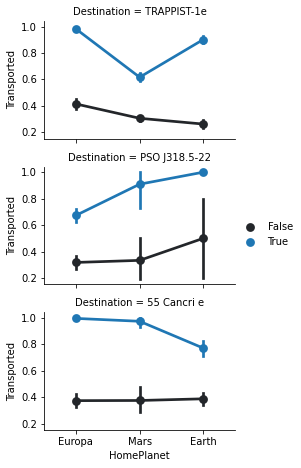

In [120]:
grid = sns.FacetGrid(train_df, row='Destination', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'HomePlanet', 'Transported', 'CryoSleep', pallete='deep')
grid.add_legend()

## __Wrangle data__

We are collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not change any value or any feature. Lets execute our decisions and assumptions for correcting, creating, and completing goals.

#### __Correcting by dropping features__

Based on our assumptions we want to drop Name feature

In [121]:
train_df = train_df.drop('Name', axis=1)
test_df = test_df.drop('Name', axis=1)
combine = [train_df,test_df]

In [122]:
train_df.shape, test_df.shape

((8693, 13), (4277, 12))

#### __Creating new feature extracting from existing__

Before dropping Cabin feature we want to create a new feature called CabinLetter by extracting the first Capital letter and last letter in the Cabin feature

* __Observations__
    * It seems there might be correlation between CabinLetter and Transported rate
    * CabinLetter B had higher Transported rate

* __Decisions__
    * Consider CabinLatter1 and 2 for model training

In [123]:
train_df['CabinLetter1'] = train_df['Cabin'].apply(lambda x: str(x).split('/')[0])
test_df['CabinLetter1'] = test_df['Cabin'].apply(lambda x: str(x).split('/')[0])
train_df['CabinLetter2'] = train_df['Cabin'].apply(lambda x: str(x).split('/')[-1])
test_df['CabinLetter2'] = test_df['Cabin'].apply(lambda x: str(x).split('/')[-1])


In [124]:
for dataset in combine:
    dataset['CabinNumber'] = dataset.Cabin.str.extract('([0-9999].)', expand=False)
    dataset['CabinNumber'] = dataset['CabinNumber'].apply(lambda x: str(x).split('/')[0])
combine = [train_df,test_df]

In [125]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinLetter1,CabinLetter2,CabinNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1


In [126]:
train_df[['CabinLetter1', 'Transported']].groupby(['CabinLetter1'], as_index=False).mean()

,CabinLetter1,Transported
0,A,0.496094
1,B,0.734275
2,C,0.680054
3,D,0.433054
4,E,0.357306
5,F,0.439871
6,G,0.516217
7,T,0.200000
8,nan,0.502513


In [127]:
train_df[['CabinLetter2', 'Transported']].groupby(['CabinLetter2'], as_index=False).mean()

,CabinLetter2,Transported
0,P,0.451260
1,S,0.555037
2,nan,0.502513


Lets drop Cabin feature. It's no need now

In [128]:
for dataset in combine:
    dataset.drop('Cabin', axis=1, inplace=True)
combine = [train_df,test_df]

#### __Completing a categorical feature__

But there is a problem with Cabbin letters and Cabin number features. Because there are some missing values. So we want to fill these with most frequently values.

In [129]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinLetter1      0
CabinLetter2      0
CabinNumber       0
dtype: int64

This shows there isn't any null values in CabinLetter features. So let's change their values manually

In [130]:
freq_cb1 = train_df.CabinLetter1.dropna().mode()[0]
freq_cb2 = train_df.CabinLetter2.dropna().mode()[0]
freq_cb1, freq_cb2

('F', 'S')

In [131]:
for dataset in combine:
    dataset['CabinLetter1'] = dataset.CabinLetter1.replace('nan', freq_cb1)
    dataset['CabinLetter2'] = dataset.CabinLetter2.replace('nan', freq_cb2)
    dataset['CabinNumber'] = (dataset['CabinNumber'].replace('nan', dataset.CabinNumber.median())).astype(int)
combine = [train_df,test_df]


In [132]:
train_df.CabinLetter1.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [133]:
train_df.CabinLetter2.unique()

array(['P', 'S'], dtype=object)

#### __Complleting Categorical features__

In [134]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinLetter1      0
CabinLetter2      0
CabinNumber       0
dtype: int64

__HomePlanet__

Lets fill empty values in HomePlanet feature with freq planet.

In [135]:
freq_planet = train_df.HomePlanet.dropna().mode()[0]

In [136]:
for dataset in combine:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna(freq_planet)
combine = [train_df,test_df]
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.427649


__CryoSleep__

Most passangers were in  without cryo sleeping. So lets fill empty cryosleep values with false

In [137]:
freq_sleep = train_df.CryoSleep.dropna().mode()[0]
freq_sleep

False

In [138]:
for dataset in combine:
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(freq_sleep)
combine = [train_df,test_df]
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.335042


__Destination__

Also fill empty destination values with frequently destination

In [139]:
freq_destination = train_df.Destination.dropna().mode()[0]
freq_destination

'TRAPPIST-1e'

In [140]:
for dataset in combine:
    dataset['Destination'] = dataset['Destination'].fillna(freq_destination)
combine = [train_df,test_df]
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


__VIP__

Fill vip empty values with most frequency choice

In [141]:
freq_vip = train_df['VIP'].dropna().mode()[0]
freq_vip

False

In [142]:
for dataset in combine:
    dataset['VIP'] = dataset['VIP'].fillna(freq_vip)
combine = [train_df,test_df]
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506475
1,True,0.381910


#### __Complete Numerical features__

Now we should fill null empty values in numerical features. There are several ways doing that

1. Generate random value between mean and standard deviation.
2. Guessing missing values by using other correlated features.(Gender, Pclass)
3. Combining 1 and 2 methods and use random value between mean and std base on set of Pclass and Gender combinations

Method 1 introduce a random noice for our dataset. But for method 2 and 3 still I can't find a good correlation between numerical features. So I fill these numeric empty values using their median

__Note: Updated:__ I fill empty values of Room service, foodcourt, shopping mall,spa, vrdeck with zeros. Because I hope to create a new feature with their total

__Instead of filling one by one I'll fill all with their median__

In [143]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(dataset.Age.median())
    dataset['RoomService'] = dataset['RoomService'].fillna(0)
    dataset['FoodCourt'] = dataset['FoodCourt'].fillna(0)
    dataset['ShoppingMall'] = dataset['ShoppingMall'].fillna(0)
    dataset['Spa'] = dataset['Spa'].fillna(0)
    dataset['VRDeck'] = dataset['VRDeck'].fillna(0)
combine =[train_df,test_df]

In [144]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinLetter1    0
CabinLetter2    0
CabinNumber     0
dtype: int64

#### __Creating a new feature from existing features.__

We want to create a new feature called Total by adding Room service, foodcourt, shopping mall,spa, vrdeck features.

In [145]:
for dataset in combine:
    dataset['Total'] = dataset['RoomService']+dataset['FoodCourt']+dataset['ShoppingMall']+dataset['Spa']+dataset['VRDeck']
combine = [train_df, test_df]

Now we dont want Room service, foodcourt, shopping mall,spa, vrdeck columns. So lets drop them

In [146]:
train_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
test_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

#### __Creating and converting numerical features__

There are huge range for numerical features.(outliers) So we can create a ranges for each of them and change their values according to ranges.

* We hope to do this for these features. 
    * Age
    * CabinNumber
    * Total

__Age__

Create a AgeBand feature

In [147]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
train_df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Transported
0,"(-0.079, 9.875]",0.711340
1,"(9.875, 19.75]",0.532792
2,"(19.75, 29.625]",0.471268
3,"(29.625, 39.5]",0.458790
4,"(39.5, 49.375]",0.506679
5,"(49.375, 59.25]",0.493716
6,"(59.25, 69.125]",0.475962
7,"(69.125, 79.0]",0.434783


Convert Age using AgeBand feature and drop it after

In [148]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 9.8, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 9.8) & (dataset['Age'] <= 19.7), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 19.7) & (dataset['Age'] <= 29.6), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 29.6) & (dataset['Age'] <= 39.5), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 39.5) & (dataset['Age'] <= 49.3), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 49.3) & (dataset['Age'] <= 59.2), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 59.2) & (dataset['Age'] <= 69.1), 'Age'] = 6
    dataset.loc[dataset['Age'] > 69.1, 'Age'] = 7
    dataset['Age'] = dataset['Age'].astype(int)
combine = [train_df,test_df]
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,CabinLetter1,CabinLetter2,CabinNumber,Total,AgeBand
0,0001_01,Europa,False,TRAPPIST-1e,3,False,False,B,P,0,0.0,"(29.625, 39.5]"
1,0002_01,Earth,False,TRAPPIST-1e,2,False,True,F,S,0,736.0,"(19.75, 29.625]"
2,0003_01,Europa,False,TRAPPIST-1e,5,True,False,A,S,0,10383.0,"(49.375, 59.25]"
3,0003_02,Europa,False,TRAPPIST-1e,3,False,False,A,S,0,5176.0,"(29.625, 39.5]"
4,0004_01,Earth,False,TRAPPIST-1e,1,False,True,F,S,1,1091.0,"(9.875, 19.75]"


__Cabin Number__

Create a Cabin number range called CBNRange by deviding cabin number to 10 peices

In [149]:
train_df['CBNRange'] = pd.cut(train_df['CabinNumber'], 10)
train_df[['CBNRange', 'Transported']].groupby(['CBNRange'], as_index=False).mean().sort_values(by='CBNRange', ascending=True)

,CBNRange,Transported
0,"(-0.099, 9.9]",0.530769
1,"(9.9, 19.8]",0.494743
2,"(19.8, 29.7]",0.535892
3,"(29.7, 39.6]",0.444776
4,"(39.6, 49.5]",0.396226
5,"(49.5, 59.4]",0.455139
6,"(59.4, 69.3]",0.512035
7,"(69.3, 79.2]",0.539503
8,"(79.2, 89.1]",0.564482
9,"(89.1, 99.0]",0.634888


Change cabin number values according to CBNRange

In [150]:
for dataset in combine:
    dataset.loc[dataset['CabinNumber'] <= 9.9, 'CabinNumber'] = 0
    dataset.loc[(dataset['CabinNumber'] > 9.9) & (dataset['CabinNumber'] <= 19.8), 'CabinNumber'] = 1
    dataset.loc[(dataset['CabinNumber'] > 19.8) & (dataset['CabinNumber'] <= 29.7), 'CabinNumber'] = 2
    dataset.loc[(dataset['CabinNumber'] > 29.7) & (dataset['CabinNumber'] <= 39.6), 'CabinNumber'] = 3
    dataset.loc[(dataset['CabinNumber'] > 39.6) & (dataset['CabinNumber'] <= 49.5), 'CabinNumber'] = 4
    dataset.loc[(dataset['CabinNumber'] > 49.5) & (dataset['CabinNumber'] <= 59.4), 'CabinNumber'] = 5
    dataset.loc[(dataset['CabinNumber'] > 59.4) & (dataset['CabinNumber'] <= 69.3), 'CabinNumber'] = 6
    dataset.loc[(dataset['CabinNumber'] > 69.3) & (dataset['CabinNumber'] <= 79.2), 'CabinNumber'] = 7
    dataset.loc[(dataset['CabinNumber'] > 79.2) & (dataset['CabinNumber'] <=  89.1), 'CabinNumber'] = 8
    dataset.loc[dataset['CabinNumber'] >  89.1, 'CabinNumber'] = 9
    dataset['CabinNumber'] = dataset['CabinNumber'].astype(int)
combine = [train_df,test_df]
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,CabinLetter1,CabinLetter2,CabinNumber,Total,AgeBand,CBNRange
0,0001_01,Europa,False,TRAPPIST-1e,3,False,False,B,P,0,0.0,"(29.625, 39.5]","(-0.099, 9.9]"
1,0002_01,Earth,False,TRAPPIST-1e,2,False,True,F,S,0,736.0,"(19.75, 29.625]","(-0.099, 9.9]"
2,0003_01,Europa,False,TRAPPIST-1e,5,True,False,A,S,0,10383.0,"(49.375, 59.25]","(-0.099, 9.9]"
3,0003_02,Europa,False,TRAPPIST-1e,3,False,False,A,S,0,5176.0,"(29.625, 39.5]","(-0.099, 9.9]"
4,0004_01,Earth,False,TRAPPIST-1e,1,False,True,F,S,0,1091.0,"(9.875, 19.75]","(-0.099, 9.9]"


__Total__

Create a range column for Total column

In [151]:
train_df['TRange'] = pd.cut(train_df['Total'], 10)
train_df[['TRange', 'Transported']].groupby(['TRange'], as_index=False).mean().sort_values(by='TRange', ascending=True)

,TRange,Transported
0,"(-35.987, 3598.7]",0.523975
1,"(3598.7, 7197.4]",0.358392
2,"(7197.4, 10796.1]",0.294118
3,"(10796.1, 14394.8]",0.295775
4,"(14394.8, 17993.5]",0.341463
5,"(17993.5, 21592.2]",0.260870
6,"(21592.2, 25190.9]",0.200000
7,"(25190.9, 28789.6]",0.333333
8,"(28789.6, 32388.3]",0.500000
9,"(32388.3, 35987.0]",0.000000


Change Total values according to TRange

In [152]:
for dataset in combine:
    dataset.loc[dataset['Total'] <= 3598.7, 'Total'] = 0
    dataset.loc[(dataset['Total'] > 3598.7) & (dataset['Total'] <= 7197.4), 'Total'] = 1
    dataset.loc[(dataset['Total'] > 7197.4) & (dataset['Total'] <= 10796.1), 'Total'] = 2
    dataset.loc[(dataset['Total'] > 10796.1) & (dataset['Total'] <= 14394.8), 'Total'] = 3
    dataset.loc[(dataset['Total'] > 14394.8) & (dataset['Total'] <= 17993.5), 'Total'] = 4
    dataset.loc[(dataset['Total'] > 17993.5) & (dataset['Total'] <= 21592.2), 'Total'] = 5
    dataset.loc[(dataset['Total'] > 21592.2) & (dataset['Total'] <= 25190.9), 'Total'] = 6
    dataset.loc[(dataset['Total'] > 25190.9) & (dataset['Total'] <= 28789.6), 'Total'] = 7
    dataset.loc[(dataset['Total'] > 28789.6) & (dataset['Total'] <=  32388.3), 'Total'] = 8
    dataset.loc[dataset['Total'] >  32388.3, 'Total'] = 9
    dataset['Total'] = dataset['Total'].astype(int)
combine = [train_df,test_df]
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,CabinLetter1,CabinLetter2,CabinNumber,Total,AgeBand,CBNRange,TRange
0,0001_01,Europa,False,TRAPPIST-1e,3,False,False,B,P,0,0,"(29.625, 39.5]","(-0.099, 9.9]","(-35.987, 3598.7]"
1,0002_01,Earth,False,TRAPPIST-1e,2,False,True,F,S,0,0,"(19.75, 29.625]","(-0.099, 9.9]","(-35.987, 3598.7]"
2,0003_01,Europa,False,TRAPPIST-1e,5,True,False,A,S,0,2,"(49.375, 59.25]","(-0.099, 9.9]","(7197.4, 10796.1]"
3,0003_02,Europa,False,TRAPPIST-1e,3,False,False,A,S,0,1,"(29.625, 39.5]","(-0.099, 9.9]","(3598.7, 7197.4]"
4,0004_01,Earth,False,TRAPPIST-1e,1,False,True,F,S,0,0,"(9.875, 19.75]","(-0.099, 9.9]","(-35.987, 3598.7]"


__Lets drop all these range collumns which we create previously__

In [153]:
train_df.drop(['AgeBand', 'TRange', 'CBNRange'], axis=1, inplace=True)

In [154]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,CabinLetter1,CabinLetter2,CabinNumber,Total
0,0001_01,Europa,False,TRAPPIST-1e,3,False,False,B,P,0,0
1,0002_01,Earth,False,TRAPPIST-1e,2,False,True,F,S,0,0
2,0003_01,Europa,False,TRAPPIST-1e,5,True,False,A,S,0,2
3,0003_02,Europa,False,TRAPPIST-1e,3,False,False,A,S,0,1
4,0004_01,Earth,False,TRAPPIST-1e,1,False,True,F,S,0,0


In [155]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,CabinLetter1,CabinLetter2,CabinNumber,Total
0,0013_01,Earth,True,TRAPPIST-1e,2,False,G,S,0,0
1,0018_01,Earth,False,TRAPPIST-1e,1,False,F,S,0,0
2,0019_01,Europa,True,55 Cancri e,3,False,C,S,0,0
3,0021_01,Europa,False,TRAPPIST-1e,3,False,C,S,0,2
4,0023_01,Earth,False,TRAPPIST-1e,2,False,F,S,0,0


In [156]:
train_df.CabinNumber.unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8, 9])

#### __Converting Categorical values to numeric__

When machine learning we can only train numerical values. Therefore we should convert our categotical features to numeric. 

__HomePlanet__

In [157]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [158]:
mapping_hp = {'Europa':0, 'Earth':1, 'Mars':2}

__CryoSleep__

In [159]:
train_df.CryoSleep.unique()

array([False,  True])

In [160]:
mapping_cs = {'False':0, 'True':1}

__Destination__

In [161]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [162]:
mapping_d = {'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}

__VIP__

In [163]:
train_df.VIP.unique()

array([False,  True])

In [164]:
mapping_v = {'False':0, 'True':1}

__Transported__

In [165]:
train_df.Transported.unique()

array([False,  True])

In [166]:
mapping_t = {'False':0, 'True':1}

__CabinLetter1__

In [167]:
train_df.CabinLetter1.unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [168]:
mapping_cb1 = {'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}

__CabinLetter2__

In [169]:
train_df.CabinLetter2.unique()

array(['P', 'S'], dtype=object)

In [170]:
mapping_cb2 = {'P':0, 'S':1}

In [171]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   bool  
 3   Destination   8693 non-null   object
 4   Age           8693 non-null   int32 
 5   VIP           8693 non-null   bool  
 6   Transported   8693 non-null   bool  
 7   CabinLetter1  8693 non-null   object
 8   CabinLetter2  8693 non-null   object
 9   CabinNumber   8693 non-null   int32 
 10  Total         8693 non-null   int32 
dtypes: bool(3), int32(3), object(5)
memory usage: 467.0+ KB


Now we can convert categorical features to ordinal with these mappings

In [172]:
for dataset in combine:
    dataset['HomePlanet'] = dataset['HomePlanet'].map(mapping_hp)
    dataset['CryoSleep'] = dataset['CryoSleep'].astype(str).map(mapping_cs)
    dataset['Destination'] = dataset['Destination'].map(mapping_d)
    dataset['VIP'] = dataset['VIP'].astype(str).map(mapping_v)
    dataset['CabinLetter1'] = dataset['CabinLetter1'].map(mapping_cb1)
    dataset['CabinLetter2'] = dataset['CabinLetter2'].map(mapping_cb2)
train_df['Transported'] = train_df['Transported'].astype(str).map(mapping_t)
combine = [train_df, test_df]

This is the final look of our data sets

In [173]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   int64 
 2   CryoSleep     8693 non-null   int64 
 3   Destination   8693 non-null   int64 
 4   Age           8693 non-null   int32 
 5   VIP           8693 non-null   int64 
 6   Transported   8693 non-null   int64 
 7   CabinLetter1  8693 non-null   int64 
 8   CabinLetter2  8693 non-null   int64 
 9   CabinNumber   8693 non-null   int32 
 10  Total         8693 non-null   int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 645.3+ KB


In [174]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,CabinLetter1,CabinLetter2,CabinNumber,Total
0,0001_01,0,0,0,3,0,0,0,0,0,0
1,0002_01,1,0,0,2,0,1,1,1,0,0
2,0003_01,0,0,0,5,1,0,2,1,0,2
3,0003_02,0,0,0,3,0,0,2,1,0,1
4,0004_01,1,0,0,1,0,1,1,1,0,0


In [175]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,CabinLetter1,CabinLetter2,CabinNumber,Total
0,0013_01,1,1,0,2,0,3,1,0,0
1,0018_01,1,0,0,1,0,1,1,0,0
2,0019_01,0,1,2,3,0,6,1,0,0
3,0021_01,0,0,0,3,0,6,1,0,2
4,0023_01,1,0,0,2,0,1,1,0,0


Now we can use this data to train our model

## __Model train, predict and slove__

Now our dataset is looking good and we have to train the model. Then we can use the model to slove the problem solution. There are many model algorithms to use. But our problem is classification and reggression problem in supervised learning. So we can use these models.

* Logistic Reggression
* KNN
* Support vector mask
* Naive bayes classifier
* Decision tree
* Random forest
* Preception
* Artificial neural network
* RVM

Now we should categorize our data into train and test data

In [176]:
X_train = train_df.drop(['PassengerId', 'Transported'], axis=1)
y_train = train_df['Transported']
X_test = test_df.drop(['PassengerId'], axis=1)
X_train.shape, y_train.shape, X_test.shape


((8693, 9), (8693,), (4277, 9))

Lets check each model algorithm one by one. And check the score

In [177]:
#  Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(round(logreg.score(X_train, y_train)*100,2),'%')

72.08 %


In [178]:
# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(round(knn.score(X_train, y_train)*100,2),'%')

75.85 %


c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [179]:
# Support vector machines
svc = SVC()
svc.fit(X_train, y_train)
print(round(svc.score(X_train, y_train)*100,2),'%')

73.17 %


In [180]:
# Gaussian Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
print(round(gaussian.score(X_train, y_train)*100,2),'%')

71.55 %


In [181]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print(round(perceptron.score(X_train, y_train)*100,2),'%')

61.22 %


In [197]:
# Linear SVC
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
print(round(linearsvc.score(X_train, y_train)*100,2),'%')

71.98 %


c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [183]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print(round(sgd.score(X_train, y_train)*100,2),'%')

71.83 %


In [184]:
# Decision Tree
decisiontr = DecisionTreeClassifier()
decisiontr.fit(X_train, y_train)
print(round(decisiontr.score(X_train, y_train)*100,2),'%')

83.08 %


In [185]:
# Random forest
rndforest = RandomForestClassifier(n_estimators=100)
rndforest.fit(X_train, y_train)
print(round(rndforest.score(X_train, y_train)*100,2),'%')

83.08 %


## __Model tuning__

Lets try these different models with different parameters and find the best algorithm for our solution

In [186]:
# define a dictionary for models and their parameters
model_param = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'gaussian' :{
        'model' : GaussianNB(),
        'params' : {
            
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [1,3,5,7,9]
        }
    },
    'tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
        }
    },
    'perceptron' : {
        'model' : Perceptron(),
        'params' : {
            'penalty' : ['l2','l1','elasticnet']
        }
    },
    'linearsvc' : {
        'model' : LinearSVC(),
        'params' : {
                 
        }
    },
    'sgd' : {
        'model' : SGDClassifier(),
        'params' : {

        }
    }
}

In [187]:
#find the best model
scores = []
for model_name, mp in model_param.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken wil

,model,best_score,best_params
0,svc,0.723113,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.682964,{'n_estimators': 10}
2,logistic_regression,0.722306,{'C': 1}
3,gaussian,0.714370,{}
4,knn,0.649606,{'n_neighbors': 9}
5,tree,0.668470,{'criterion': 'entropy'}
6,perceptron,0.614850,{'penalty': 'l1'}
7,linearsvc,0.720236,{}
8,sgd,0.716210,{}


## __Model training and predict__

So according to above chart we can see SVC is the best scored model with these parameters. So let's use that to train our model.

In [188]:
model = SVC(C=1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### __Submission__

Lets do our submission

Convert y_pred result to boolian

In [198]:
result = y_pred.astype(bool)

In [199]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Transported':result
})
submission.to_csv('submission.csv', index=False)

In [200]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
